In [1]:
import numpy as np
import pandas as pd

# Load data

In [2]:
doc_word = np.load('science2k-doc-word.npy')
titles = pd.read_csv('science2k-titles.txt', encoding='utf-8', header=None, names=['titles'])
vocab = pd.read_csv('science2k-vocab.txt', encoding='utf-8', header=None, names=['vocab'])

# (a) doc-word

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
sns.set(style='darkgrid')

## Use Elbow method to find best K

In [219]:
# reference: https://pythonprogramminglanguage.com/kmeans-elbow-method/

def distortion(X, cluster_centers):
    return sum(np.min(cdist(X, cluster_centers, 'euclidean'), axis=1)) / X.shape[0]
k_range = range(2, 21)
scores = [distortion(doc_word, KMeans(n_clusters=k, n_init=20, n_jobs=-1).fit(doc_word).cluster_centers_) for k in k_range]

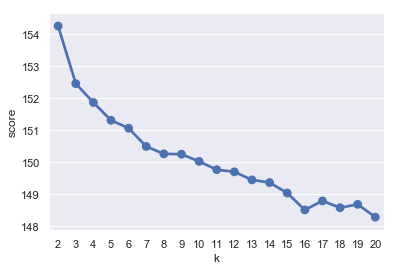

In [220]:
sns.pointplot(x='k', y='score', data=pd.DataFrame({'k': k_range, 'score': scores}), markers='o')

The figure shows that 8 may be the best k.

In [233]:
kmeans_k = 8
kmeans = KMeans(n_clusters=kmeans_k, n_init=20, n_jobs=-1)
titles['kmeans_label'] = kmeans.fit_predict(doc_word)

In [234]:
print titles['kmeans_label'].value_counts()

6    431
4    205
2    181
1    156
3    155
7    144
5     71
0     30
Name: kmeans_label, dtype: int64


In [235]:
vector_mean = doc_word.mean(axis=0)

## Top 10 words in each cluster

In [236]:
for i in range(kmeans_k):
    word_dis = abs(kmeans.cluster_centers_[i] - vector_mean)
    sorted_args = word_dis.argsort()[::-1]
    top_10_args = sorted_args[:10]
    top_10_words = vocab['vocab'][top_10_args].values.tolist()
    print 'cluster %d:' % i
    print '\n'.join(top_10_words)
    print ''

cluster 0:
residues
crystal
binding
conserved
side
helix
loop
chains
residue
structural

cluster 1:
says
researchers
fig
scientists
year
just
get
people
last
usa

cluster 2:
protein
gene
proteins
cell
sequence
genes
dna
cells
amino
sequences

cluster 3:
cells
expression
cell
protein
mice
expressed
antibody
mouse
induced
expressing

cluster 4:
energy
electron
fig
density
shows
temperature
structure
human
measured
constant

cluster 5:
responses
response
neurons
stimuli
visual
significant
stimulus
fig
test
cortex

cluster 6:
fig
mail
shown
reports
observed
function
correspondence
start
analysis
addressed

cluster 7:
values
global
north
estimates
estimate
surface
years
variations
lower
period



## Top 10 documents closest to each cluster center

In [237]:
grouped_titles = titles.groupby('kmeans_label')

In [238]:
for i in range(kmeans_k):
    cur_group = grouped_titles.get_group(i)
    cur_group['distance'] = cur_group.apply(lambda row: np.linalg.norm(doc_word[row.name] - kmeans.cluster_centers_[i]), axis=1)
    sorted_args = np.array(cur_group['distance'].values.tolist()).argsort()
    print 'cluster %d:' % i
    print '\n'.join(cur_group.iloc[sorted_args[:10]]['titles'].tolist())
    print ''

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


cluster 0:
Structure of Yeast Poly(A) Polymerase Alone and in Complex with 3'-dATP
Structure of Murine CTLA-4 and Its Role in Modulating T Cell Responsiveness
Structure of the S15,S6,S18-rRNA Complex: Assembly of the 30S Ribosome Central Domain
Atomic Structure of PDE4: Insights into Phosphodiesterase Mechanism and Specificity
Twists in Catalysis: Alternating Conformations of Escherichia coli Thioredoxin Reductase
The Productive Conformation of Arachidonic Acid Bound to Prostaglandin Synthase
Redox Signaling in Chloroplasts: Cleavage of Disulfides by an Iron-Sulfur Cluster
Convergent Solutions to Binding at a Protein-Protein Interface
Structural Basis of Smad2 Recognition by the Smad Anchor for Receptor Activation
Structure of the Protease Domain of Memapsin 2 (b-Secretase) Complexed with Inhibitor

cluster 1:
Information Technology Takes a Different Tack
Science Survives in Breakthrough States
Vaccine Studies Stymied by Shortage of Animals
For 'Father' of Abortion Drug, Vindication at

# (b) word-doc

In [239]:
word_doc = np.load('science2k-word-doc.npy')

## Use Elbow method to find best K

In [261]:
# reference: https://pythonprogramminglanguage.com/kmeans-elbow-method/

k_range = range(2, 21)
scores = [distortion(word_doc, KMeans(n_clusters=k, n_init=20, n_jobs=-1).fit(word_doc).cluster_centers_) for k in k_range]

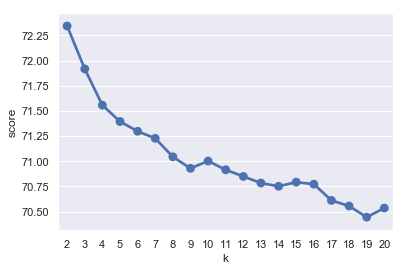

In [262]:
sns.pointplot(x='k', y='score', data=pd.DataFrame({'k': k_range, 'score': scores}), markers='o')

The figure shows that 9 may be the best k.

In [277]:
kmeans_k = 9
kmeans = KMeans(n_clusters=kmeans_k, n_init=20, n_jobs=-1)
vocab['kmeans_label'] = kmeans.fit_predict(word_doc)

In [278]:
print vocab['kmeans_label'].value_counts()

6    2708
4     770
3     558
2     512
1     270
7     249
8     167
5     138
0     104
Name: kmeans_label, dtype: int64


In [280]:
vector_mean = word_doc.mean(axis=0)

## Top 10 titles in each cluster

In [281]:
for i in range(kmeans_k):
    doc_dis = abs(kmeans.cluster_centers_[i] - vector_mean)
    sorted_args = doc_dis.argsort()[::-1]
    top_10_args = sorted_args[:10]
    top_10_titles = titles['titles'][top_10_args].values.tolist()
    print 'cluster %d:' % i
    print '\n'.join(top_10_titles)
    print ''

cluster 0:
Regulated Cleavage of a Contact-Mediated Axon Repellent
Noxa, a BH3-Only Member of the Bcl-2 Family and Candidate Mediator of p53-Induced Apoptosis
Positional Syntenic Cloning and Functional Characterization of the Mammalian Circadian Mutation tau
Signaling and Circuitry of Multiple MAPK Pathways Revealed by a Matrix of Global Gene Expression Profiles
Interacting Molecular Loops in the Mammalian Circadian Clock
Cross Talk between Interferon-g and -a/b Signaling Components in Caveolar Membrane Domains
Regulation of STAT3 by Direct Binding to the Rac1 GTPase
Function of PI3Kg in Thymocyte Development, T Cell Activation, and Neutrophil Migration
Central Role for G Protein-Coupled Phosphoinositide 3-Kinase g in Inflammation
Protein Interaction Mapping in C. elegans Using Proteins Involved in Vulval Development

cluster 1:
Status and Improvements of Coupled General Circulation Models
Sedimentary Rocks of Early Mars
Climate Extremes: Observations, Modeling, and Impacts
A 22,000-Ye

## Top 10 words closest to each cluster center

In [282]:
grouped_words = vocab.groupby('kmeans_label')

In [283]:
for i in range(kmeans_k):
    cur_group = grouped_words.get_group(i)
    cur_group['distance'] = cur_group.apply(lambda row: np.linalg.norm(word_doc[row.name] - kmeans.cluster_centers_[i]), axis=1)
    sorted_args = np.array(cur_group['distance'].values.tolist()).argsort()
    print 'cluster %d:' % i
    print '\n'.join(cur_group.iloc[sorted_args[:10]]['vocab'].tolist())
    print ''

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


cluster 0:
kinase
promoter
polymerase
staining
pcr
mrna
vivo
regulated
assay
signaling

cluster 1:
decadal
holocene
anomaly
sst
basins
tropics
equator
sedimentary
lunar
silicate

cluster 2:
resonant
anisotropic
fermi
crystallographic
reflections
tunneling
metallic
lying
transverse
incident

cluster 3:
triton
methionine
glutathione
agarose
isoforms
glycerol
histidine
cys
subcellular
glycine

cluster 4:
celera
intelligence
managers
income
schools
math
weapons
capital
court
draft

cluster 5:
start
gray
decrease
error
peak
res
magnitude
fraction
rev
maximum

cluster 6:
aptamers
lcts
dnag
trxr
neas
doxy
proteorhodopsin
lg268
nompc
rory

cluster 7:
lymphoid
immunoreactivity
injury
transplantation
cd8
abnormalities
littermates
hematopoietic
systemic
inflammatory

cluster 8:
researcher
didnt
doesnt
hopes
got
plans
getting
biologist
cant
theres

